<center>
<h1>Deep Learning with Python - Francois Chollet</h1>
<h2> Chapter 05</h2>
<h3> Fundamentals of Machine Learning</h3>
</center>


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist

from sklearn.model_selection import KFold


## <center>Citations</center>

> The fundamental issue in machine learning is the tension between optimization and generalization. Optimization refers to the process of adjusting a model to get the best performance possible on the training data (the learning in machine learning), whereas generalization refers to how well the trained model performs on data it has never seen before.

> Noisy features inevitably lead to overfitting. As such, in cases where you aren’t sure whether the features you have are informative or distracting, it’s common to do feature selection before training. [...] The typical way to do feature selection is to compute some usefulness score for each feature available.

> A remarkable fact about deep learning models is that they can be trained to fit anything, as long as they have enough representational power.

>  As it turns out, the nature of generalization in deep learning has rather little to do with deep learning models themselves, and much to do with the structure of information in the real world.

> More generally, the manifold hypothesis posits that all natural data lies on a low-dimensional manifold within the high-dimensional space where it is encoded. That’s a pretty strong statement about the structure of information in the universe. As far as we know, it’s accurate, and it’s the reason why deep learning works. [...] The manifold hypothesis implies that:
> - Machine learning models only have to fit relatively simple, low-dimensional, highly structured subspaces within their potential input space (latent manifolds).
> - Within one of these manifolds, it’s always possible to interpolate between two inputs, that is to say, morph one into another via a continuous path along which all points fall on the manifold.

> If you work with data points that can be interpolated, you can start making sense of points you’ve never seen before by relating them to other points that lie close on the manifold. In other words, you can make sense of the totality of the space using only a sample of the space. You can use interpolation to fill in the blanks. [...] I would be a mistake to assume that interpolation is all there is to generalization. It’s the tip of the iceberg. Interpolation can only help you make sense of things that are very close to what you’ve seen before: it enables local generalization.

- Remark: humans are capable of _extreme generalization_

> Further, because deep learning is curve fitting, for a model to perform well it needs to be trained on a dense sampling of its input space. A “dense sampling” in this context means that the training data should densely cover the entirety of the input data manifold

- "Dense sampling" é basicamente o balanceamento do dataset. É um paralelo da "validade externa" para experimentos causais.

> Evaluating a model always boils down to splitting the available data into three sets: **_training, validation, and test_**.

> [...] Tuning the configuration of the model based on its performance on the validation set can quickly result in **_overfitting to the validation set_**, even though your model is never directly trained on it.

> To achieve the perfect fit, you must first overfit. Since you don’t know in advance where the boundary lies, you must cross it to find it. Once you have such a model, you’ll focus on refining generalization by fighting overfitting.

> Finding the exact point during training where you’ve reached the most generalizable fit—the exact boundary between an underfit curve and an overfit curve—is one of the most effective things you can do to improve generalization.

> Using a model that makes the right assumptions about the problem is essential to achieve generalization: you should leverage the right architecture priors.

> **_Deep learning is curve fitting, not magic._** 

***

## <center>Summary</center>

**_What is underfitting?_**

Underfitting happens when your model hasn't learned all the relevant patterns in your training data. This can be visualized through the continuous descent of the validation loss.

**_What is overfitting?_**

Overfitting happens when your model memorizes the training data. When this happens, the model loses the generalization property and starts to perform poorly on new data.

**_What is a robust fit?_**

A robust fit happens when a model achieved a good balance between underfitting and overfitting, that is, learns all the relevant patterns in training data and is able to generalize that learning to new data.

**_What is a manifold?_**

A “manifold” is a lower-dimensional subspace of some parent space that is locally similar to a linear (Euclidian) space. In deep learning, the _manifold hypothesis_ is used to reduce dimensionality of information in observable data and build models that fit in simple subspaces within their potential input space, and models that can _interpolate_ between two inputs (this is generalization and depends on the continuity of the manifold, thus, on the continuity of the training data).

**_What is generalization and how it is achieved by neural networks?_**

[Generalization refers to your model's ability to adapt properly to new, previously unseen data, drawn from the same distribution as the one used to create the model.](https://developers.google.com/machine-learning/crash-course/generalization/video-lecture?hl=en) Neural networks achieve generalization through the use of the _manifold hypothesis_. The hypothesis posits that all natural (meaningful and observable data) lies on a low-dimensional manifold within the high-dimensional space where it is encoded. If all the data lies in a low-dimensional manifold, and we have enough data that this subspace is continuous, we can use the relevant features in the data (obtained through the training process of the model) to do interpolation with never seen before data. Is this interpolation is successful, we have achieved _local_ generalization.

**_What is linear interpolation? What is interpolation on the latent manifold?_**

The author has [this](https://twitter.com/fchollet/status/1450524893682884609) Twitter thread explaining it. Basically, linear interpolation is a method to "discover" new data based on known data. Linear interpolation happens in the dimension in which the raw data is encoded. Interpolation on the latent manifold is the interpolation process in a low-dimension manifold, that is, where the meaningful information lives.

**_Types of validation_**

- **_Simple holdout validation:_** split data in three sets (training, validation, and test), train the model on the training set, use the validation set to tweak hyperparameters, test the model on the test set.
- **_K-fold validation:_** split data in two sets (training and test), in the training process split the training set in k sets, train the model on $k - 1$ training sets, use the $kth$ validation set to tweak hyperparameters, test the model on the test set.
- **_Iterated K-fold validation with shuffling:_** split data in two sets (training and test), shuffle the training set and split it in k sets, train the model on $k - 1$ training sets, use the $kth$ validation set to tweak hyperparameters, test the model on the test set.

**_What is and how to choose a common-sense baseline?_**

A common-sense baseline is the _minimum_ performance required to your model being considered useful. This baseline could be the performance of a random classifier, or the performance of the simplest non-machine learning technique you can imagine.

**_Regularization techniques_**

> A common way to mitigate overfitting is to put constraints on the complexity of a model by forcing its weights to take only small values, which makes the distribution of weight values more regular. This is called weight regularization, and it’s done by adding to the loss function of the model a cost associated with having large weights.

- **_L1 regularization_**: The cost added is proportional to the _absolute value of the weight coefficients_.
- **_L2 regularization_**: The cost added is proportional to the _square of the value of the weight coefficients_.
- **_Dropout_**: Consists of randomly dropping out (setting to zero) a number of output features of the layer during training. The core idea is that introducing noise in the output values of a layer can break up happenstance patterns that aren’t significant.

**_How dropout works?_**

Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass, and any weight updates are not applied to the neuron on the backward pass. [Ref](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/)


**_What is EarlyStopping?_**

Early stopping is an optimization technique used to reduce overfitting without compromising on model accuracy. The main idea behind early stopping is to stop training when a monitored metric has stopped improving (before the model starts to overfit). See the image below for reference:

![](assets/2023-06-15-16-10-08.png)

***



## <center>Questions</center>

> O que o autor quis dizer no terceiro parágrafo da página 125?

- Há de ver se a diferença colocada ali é estatisticamente significante para a todos os reviews. Caso não seja, aquela proporção de comentários negativos/positivos é específica do conjunto de treinamento e, portanto, causa overfitting.

> Durante os exemplos do capítulo, ele lidou com o ruído do dataset retirando as observações e associou isso a feature selection. Feature engineering/selection quando estamos trabalhando com texto é isso? É aumentar a qualidade dos dados e remover os outliers?

- Feature engineering é decidir qual valores entram no seu modelo e como eles entram (escala, encoding, etc). Em deep learning não fazemos feature engineering, mas fazemos feature selection, que é selecionar as melhores observações para o modelo e tentar ao máximo balancear os datasets retirando aquilo que entendemos como ruído. Além dessa _curadoria_ dos dados, também utilizamos técnicas de regularização para evitar o overfitting.

> How can we find good common-sense baselines for our tasks?

- Para a nossa atividade em mãos, não temos benchmark de senso comum. As nossas baselines serão baseadas em artigos.

***


## <center>Multiclass Classification with MNIST</center>

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
print(np.unique(train_labels))

[0 1 2 3 4 5 6 7 8 9]


In [4]:
dir(mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [5]:
train_images = train_images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [12]:
def build_model():
    model = keras.Sequential(
        [
            layers.Dense(784, activation="relu", ),
            layers.Dense(512, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ],
        name="CommonSeqModel"
    )

    model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    return model

In [31]:
def build_model_l2():
    model = keras.Sequential(
        [
            layers.Dense(784, kernel_regularizer=regularizers.l2(0.002), activation="relu", ),
            layers.Dense(512, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
            layers.Dense(10, activation="softmax"),
        ],
        name="SequentialModelL2"
    )

    model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    return model

In [32]:
def build_model_l1():
    model = keras.Sequential(
        [
            layers.Dense(784, kernel_regularizer=regularizers.l1(0.002), activation="relu", ),
            layers.Dense(512, kernel_regularizer=regularizers.l1(0.002), activation="relu"),
            layers.Dense(10, activation="softmax"),
        ],
        name="SequentialModelL1"
    )

    model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    return model

In [33]:
def build_model_dropout():
    model = keras.Sequential(
        [
            layers.Dense(784, activation="relu", ),
            layers.Dropout(.2),
            layers.Dense(512, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ],
        name="SequentialModelDropout"
    )

    model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    return model

In [10]:
def train_model(model, train_features, train_targets, epochs, batch_size):

    kfolds = KFold(n_splits=3, shuffle=True).split(train_features, train_targets)
    histories = []

    for fold, (train, test) in enumerate(kfolds):
    
        print(f"Processing fold #{fold}")
    
        history = model.fit(
            train_images[train],
            train_labels[train],
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(train_images[test], train_labels[test]),
            verbose=False,
        )

        histories.append(history)

    return histories


In [27]:
def get_performance(histories, metric):

    avg_training_loss = np.mean([h.history["loss"] for h in histories], axis=0)
    avg_training_metric = np.mean([h.history[metric] for h in histories], axis=0)

    avg_validation_loss = np.mean([h.history["val_loss"] for h in histories], axis=0)
    avg_validation_metric = np.mean([h.history["val_" + metric] for h in histories], axis=0)

    return avg_training_loss, avg_training_metric, avg_validation_loss, avg_validation_metric


def plot_performance(axes, histories, metric, epoch):

    avg_training_loss, avg_training_metric, avg_validation_loss, avg_validation_metric = get_performance(histories, metric)
    epochs = range(1, epoch + 1)

    axes[0].plot(epochs, avg_training_loss, "m", label="Training Loss")
    axes[0].plot(epochs, avg_validation_loss, "b", label="Validation Loss")
    axes[0].set_title("Training and validation loss")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Loss")
    axes[0].legend()

    axes[1].plot(epochs, avg_training_metric, "m", label="Training " + metric)
    axes[1].plot(epochs, avg_validation_metric, "b", label="Validation " + metric)
    axes[1].set_title("Training and validation " + metric)
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel(metric)
    axes[1].legend()


Processing fold #0
Processing fold #1
Processing fold #2


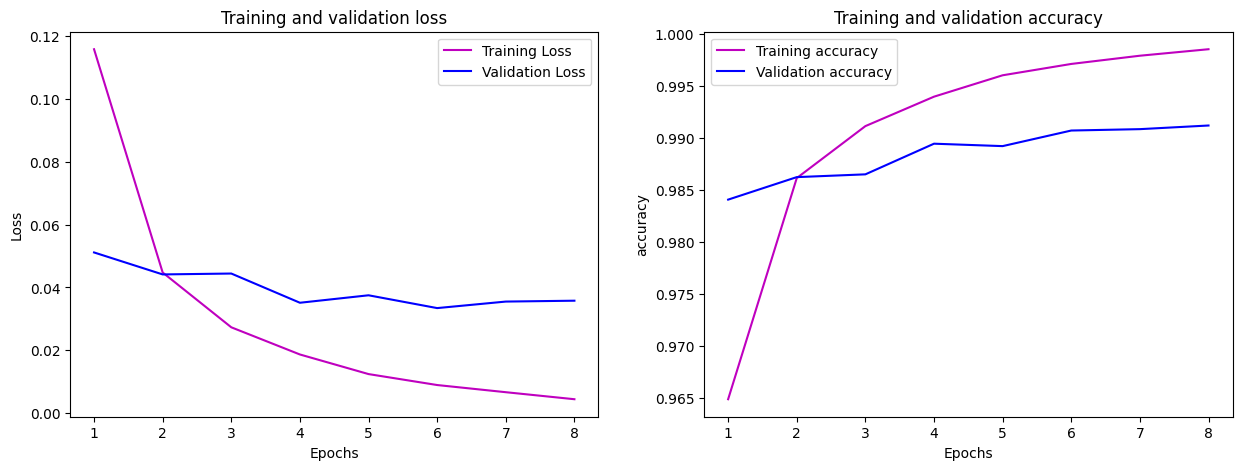

CommonSeqModel


In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

model = build_model()

histories = train_model(model, train_images, train_labels, 8, 128)

print(model.name)

plot_performance(axes, histories, "accuracy", 8)

plt.show()

Processing fold #0
Processing fold #1
Processing fold #2
SequentialModelL1


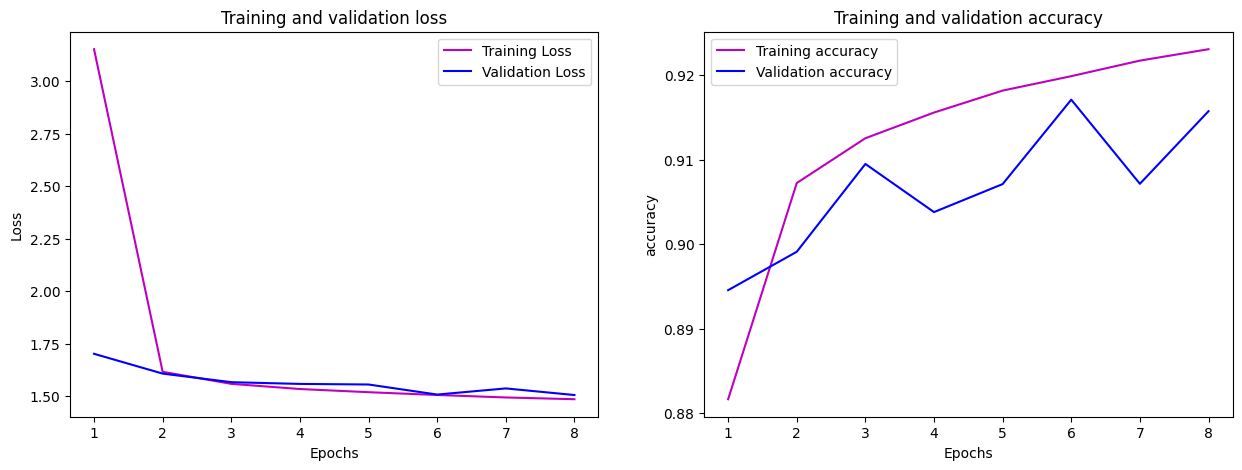

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

model = build_model_l1()

histories = train_model(model, train_images, train_labels, 8, 128)

print(model.name)

plot_performance(axes, histories, "accuracy", 8)

plt.show()

Pay attention to the graph y-axis scale

Processing fold #0
Processing fold #1
Processing fold #2
SequentialModelL2


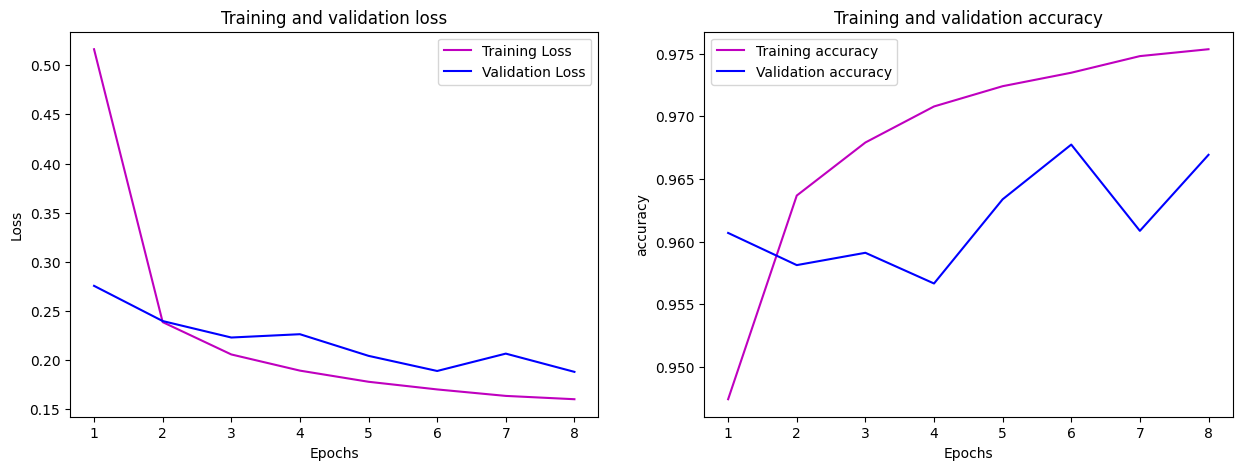

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

model = build_model_l2()

histories = train_model(model, train_images, train_labels, 8, 128)

print(model.name)

plot_performance(axes, histories, "accuracy", 8)

plt.show()

Processing fold #0
Processing fold #1
Processing fold #2
SequentialModelDropout


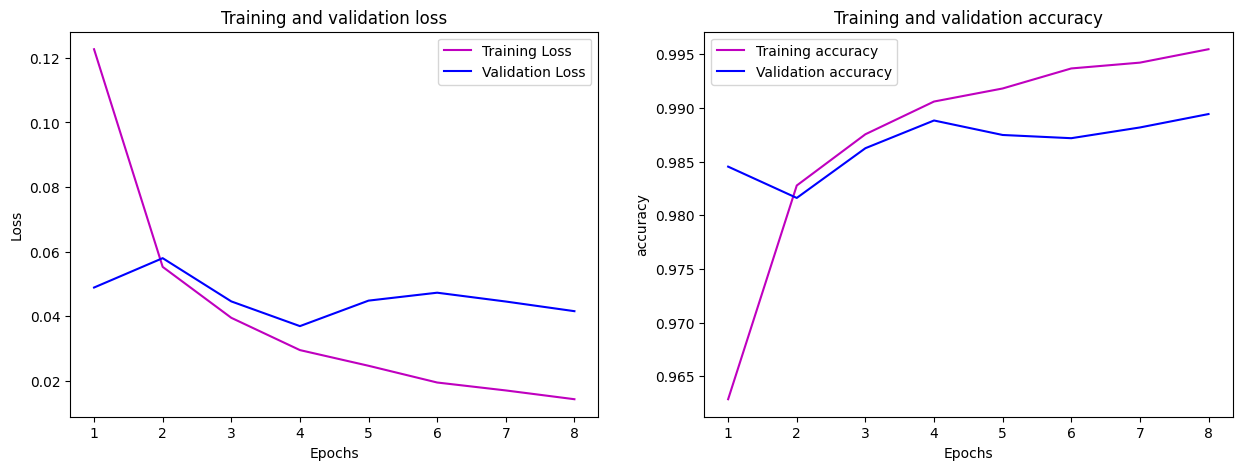

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

model = build_model_dropout()

histories = train_model(model, train_images, train_labels, 8, 128)

print(model.name)

plot_performance(axes, histories, "accuracy", 8)

plt.show()

***